# $\fbox{$\textbf{COMPUTATIONAL TRAINING WITH PYTORCH}$}$

This notebook is an introduction to the popular deep learning library PyTorch. PyTorch is a low-level API that has gained a lot of attention in the research community since its initial release in 2016 due to its highly flexible framework. PyTorch is designed as a pythonic numpy-friendly package allowing you to control every single aspect of your model and training scheme in a modular way, and quickly get to prototyping custom architectures. 

PyTorch core feature *Autograd* allows you to easily propagate gradients through a computational graph following the chain rule. Its modular nature roughly revolves around a couple of building blocks:

- `torch.Tensor`: the base tensor object class – [docs](https://pytorch.org/docs/stable/tensors.html)
- `torch.autograd`: automatic differentiation (in practice you won't get to manipulate it so much) – [docs](https://pytorch.org/docs/stable/autograd.html)
- `torch.nn`: module containing predefined and customizable building blocks for computational graphs – [docs](https://pytorch.org/docs/stable/nn.html)


Of course, PyTorch has much more to offer and a rich [ecosystem](https://pytorch.org/ecosystem/) of libraries built around it, but in this tutorial we will try to cover the fundamentals of PyTorch automatic differentiation only, to provide you the necessary tools and understanding to tackle more complex machine learning problems.

To start, follow the instructions from https://pytorch.org to install PyTorch.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tqdm

---
# $\textbf{1 - The Tensor Class}$

PyTorch introduces a `torch.Tensor` class of objects reprensenting multi-dimensional arrays. It is designed to be very compatible with `numpy` $\Rightarrow$ globally, __syntax very similar to `numpy`__. Just see by yourself the following cells.

### Explicit Tensor Definition 
PyTorch tensors can be explicitely defined out of list as:

In [2]:
x = torch.tensor([2, 2, 2], dtype=torch.float64)
y = torch.tensor([3, 3, 3])

print("Object class :", type(x))
print("x =", x)
print("y =", y)

Object class : <class 'torch.Tensor'>
x = tensor([2., 2., 2.], dtype=torch.float64)
y = tensor([3, 3, 3])


### Some basic tensor methods and attributes

As for numpy arrays, tensors objects support slicing and have baked in attributes that will make your life easier. We showcase here a few of there is much more you can do.

In [3]:
# A - Access first element - further slicing works as well
output = x[0]
print("(A) - First element :", output)

# B - Get scalar value of first element - add .item()
output = x[0].item()
print("(B) - First element as scalar:", output)

# C - Get tensor shape - like in numpy but returns torch.Size object
output = x.shape
print("(C) - Shape :", output)

# D - Get tensor dimensionality
output = x.ndim
print("(D) - Nb dimensions :", output)

# E - Get tensor number of elements
output = x.numel()
print("(E) - Nb elements :", output)

# F - Get tensor mean
output = x.mean()
print("(F) - Mean :", output)

# G - Get tensor sum
output = x.sum()
print("(G) - Sum :", output)

(A) - First element : tensor(2., dtype=torch.float64)
(B) - First element as scalar: 2.0
(C) - Shape : torch.Size([3])
(D) - Nb dimensions : 1
(E) - Nb elements : 3
(F) - Mean : tensor(2., dtype=torch.float64)
(G) - Sum : tensor(6., dtype=torch.float64)


### Tensor data type

As for numpy arrays, `torch.Tensor` can only contain elements of a single data type, e.g. `torch.float16`, `torch.float32`, `torch.int16` etc. The latter can be specified at tensor definition as:

```
>>> x = torch.tensor([2, 2, 2], dtype=torch.float64)
>>> x
x = tensor([2., 2., 2.], dtype=torch.float64)
```
A comprehensive list of possible tensor data types can be found [here](https://pytorch.org/docs/stable/tensors.html). 

Short-hand methods are provided though to cast tensors as `int32` or `float32` which are default types for integers and floats

In [4]:
# A - Casting as an 32-integer tensor
x = x.int()
assert isinstance(x, torch.IntTensor)
print("(A) - Data type :", x.dtype)
print("x as an integer tensor :", x, "\n")

# B - Casting as a 32-float tensor
x = x.float()
assert isinstance(x, torch.FloatTensor)
print("(B) - Data type :", x.dtype)
print("x as an float tensor : ", x)

(A) - Data type : torch.int32
x as an integer tensor : tensor([2, 2, 2], dtype=torch.int32) 

(B) - Data type : torch.float32
x as an float tensor :  tensor([2., 2., 2.])


### Basic operations

You can perform mathematical operations as you are used to with `numpy` arrays

In [5]:
# Do some simple arithmetics
print("x + y =", x + y)
print("x - y =", x - y)
print("x * y =", x * y)
print("x / y =", x / y)

x + y = tensor([5., 5., 5.])
x - y = tensor([-1., -1., -1.])
x * y = tensor([6., 6., 6.])
x / y = tensor([0.6667, 0.6667, 0.6667])


In [11]:
# Or linear algebra
A = torch.tensor([[3., 2.],
                  [4., 3.]])
v = torch.tensor([2., 1.])

print("Av =", A @ v)
print("A^T =", A.T)
print("A^-1 =", A.inverse())

Av = tensor([ 8., 11.])
A^T = tensor([[3., 4.],
        [2., 3.]])
A^-1 = tensor([[ 3., -2.],
        [-4.,  3.]])


### Implicit tensors definition

As with `numpy`, you can also define tensors of zeros, ones or random tensors by specifying their shape

In [6]:
# A - a tensor of shape (5,) full of zeros
zeros_tensor = torch.zeros(5)
print("(A) - Zeros tensor :", zeros_tensor)

# B - a tensor of shape (5,) full of ones
ones_tensor = torch.ones(5)
print("(B) - Ones tensor :", ones_tensor)

# C - a tensor of shape (5,) full of uniformly drawn number over [0,1]
uniform_random_tensor = torch.rand(5)
print("(C) - Uniform random tensor :", uniform_random_tensor)

# D - a tensor of shape (5,) full of normally drawn number N(0,1)
normal_random_tensor = torch.randn(5)
print("(D) - Normal random tensor :", normal_random_tensor)

(A) - Zeros tensor : tensor([0., 0., 0., 0., 0.])
(B) - Ones tensor : tensor([1., 1., 1., 1., 1.])
(C) - Uniform random tensor : tensor([0.0867, 0.8892, 0.3934, 0.5218, 0.5848])
(D) - Normal random tensor : tensor([ 0.8277, -0.5649,  0.2604,  0.4090, -0.2215])


### `torch.Tensor` $\leftrightarrow$ `np.ndarray`

Finally, to complete the `numpy` compatibility, it is possible to cast `numpy` arrays as `torch.Tensor` and reciprocally as:

In [7]:
# numpy -> torch
numpy_array = np.array([1, 2, 3])
torch_tensor = torch.from_numpy(numpy_array)
print("Torch Tensor : ", torch_tensor)

# torch -> numpy
numpy_array = torch_tensor.numpy()
print("Numpy Array : ", numpy_array)

Torch Tensor :  tensor([1, 2, 3])
Numpy Array :  [1 2 3]


---
# $\textbf{2 - Automatic differentiation with PyTorch}$

### So what's up with PyTorch, why not just keep using numpy arrays if it serves the same purpose?  

Well, PyTorch has an additional very interesting feature called the __autograd function__. Basically, tensors can keep track of sequences of operations applied to them in a graph structure which facilitates backpropagation of gradient with chain rule within this graph structure.

Consider for example the simple linear regression function defined by

$$f_\theta(\mathbf{x}) = \mathbf{x}^\top \mathbf{w} + b\enspace\text{where}\enspace\theta = \begin{bmatrix}
\mathbf{w} \\
b
\end{bmatrix}$$

We can easily see that $\nabla_\mathbf{w} f_\theta(\mathbf{x}) = \mathbf{x}$ and $\nabla_b f_\theta(\mathbf{x}) = 1$

Now in PyTorch, the computation of $f_\theta$ would typically be represented by the following graph where the orange nodes correspond to tensors keeping track of every operation applied to them

<img src="linear-model-graph.png">

> __In practice :__ _toggle `my_tensor.requires_grad=True` and your tensor will keep track of its computational graph (i.e. turn orange). If you'd like to run some computations without tracking them though, you can always use the `torch.no_grad()` wrapper (see below in "Optimizing parameters tensors with Autograd" example)_

PyTorch will then be able to backpropagate output derivative through the computational graph using the chain rule and hence derive gradient wrt $\mathbf{w}$ and $\mathbf{b}$.

It means that once you have fed your computational graph with __input__ $\mathbf{x}$ and have retrieved your __output__ $y$, PyTorch will be able to compute the __partial derivative__ corresponding to __each step of the graph__ and __combine them__ to obtain the derivative w.r.t. the parameters of interest - here the weight vector $\mathbf{w}$ and bias $b$ in orange.

<img src="backprop-linear-model.png">


In this example, we retrieve the derivatives w.r.t to $\mathbf{w}$ and $b$ through the chain rule as

$$
\nabla_\mathbf{w}f_\theta(\mathbf{x}) = \frac{\partial y}{\partial (\mathbf{x}^\top\mathbf{w} + b)}\frac{\partial (\mathbf{x}^\top\mathbf{w} + b)}{\partial (\mathbf{x}^\top\mathbf{w})}\frac{\partial (\mathbf{x}^\top\mathbf{w})}{\partial \mathbf{w}} = 1\times 1\times \mathbf{x} = \mathbf{x}
$$

$$
\nabla_b f_\theta(\mathbf{x}) = \frac{\partial y}{\partial (\mathbf{x}^\top\mathbf{w} + b)}\frac{\partial (\mathbf{x}^\top\mathbf{w} + b)}{\partial b} = 1\times 1 = 1
$$

> __In practice :__ _once you have computed the output `y`, simply call `y.backward()` and pytorch will take care of this for you. Then you can retrieve gradients by querying `.grad` attribute of your tensors_

Let's now write the code corresponding to this simple example and verify the obtain gradients correspond to what we would have expected, i.e. $\nabla_\mathbf{w} f_\theta(\mathbf{x}) = \mathbf{x}$ and $\nabla_b f_\theta(\mathbf{x}) = 1$

In [8]:
# Define random weight and bias tensors with required_grad=True to keep track of operations graph
w = torch.randn(5)
b = torch.randn(1)
w.requires_grad = True
b.requires_grad = True

# Define some random input vector x with same dimension as weight vector
x = torch.randn(5)

# Construct computational graph corresponding to linear model - that's how simple this is
y = w.matmul(x) + b

# Automatic gradient computation at x
y.backward()

# Print gradients of f at x
print("Input tensor x :", x)
print("Gradient wrt w :", w.grad)
print("Gradient wrt b :", b.grad)

Input tensor x : tensor([-0.1051,  1.2779,  2.1188, -0.0846,  0.9409])
Gradient wrt w : tensor([-0.1051,  1.2779,  2.1188, -0.0846,  0.9409])
Gradient wrt b : tensor([1.])


---
# $\textbf{3 - Modularization with}$ `torch.nn.Module`


We've seen the idea behing PyTorch autograd on a plain example where we only had to define a weight tensor `w` and a bias tensor `b` and perform a straightforward affine operation `x.matmul(w) + b`.

In general though, when you have more tensors performing complex operations, it can be quite cumbersome to define manually every tensor requiring a gradient and explicitely writing construction of computational graph every time we want to run inference.

> _e.g. if you have several layers, you don't want to be defining lots of tensors `w1, w2, ..., wn`, `b1, b2, ..., bn` and explicitely write the model computation `y = w1.matmul(w2.matmul(... wn.matmul(x) + bn) + ...) + b2) + b1` __every single time__ that you need to run a computation, that would be a real pain_


PyTorch proposes to rather wrap such sequence of operations into a child class inheriting from `torch.nn.Module` which is friendly with the autograd functionality. In practice, the syntax goes:

```
class DummyModel(torch.nn.Module):

    def __init__(self, *args, **kwargs):
        super().__init__()
        # define all your tensors and parameters once
        
    def forward(self, x):
        # define computational graph construction on x, once
        return output


model = DummyModel(# fill in with required arguments to define your tensors)
```

and then, given an input tensor `x`, you can simply call `y = model(x)` to define the computational graph on `x`.



Let's see what this looks like for the previous example

In [9]:
class LinearModel(torch.nn.Module):
    """Module defining computation of linear model
    
    Args:
        size (int): input tensor size
        
    Attributes:
        w (torch.Tensor): weight tensor
        b (torch.Tensor): bias tensor
    """
    def __init__(self, size):
        super().__init__()
        # Wrapping tensors as torch.nn.Parameter, we make them module parameters requiring gradient
        self.w = torch.nn.Parameter(torch.randn(size))
        self.b = torch.nn.Parameter(torch.randn(1))
        
    def forward(self, x):
        """Runs execution of <w,x> + b
    
        Args:
            x (torch.Tensor): input variable tensor
        """
        y = self.w.matmul(x) + self.b
        return y

In [10]:
# Instantiate module instance with same coefficients as previously
f = LinearModel(size=5)

# Define zero tensor with required_grad=True to keep track of operations graph
x = torch.randn(5)

# Run forward method by simply calling function
y = f(x)

# Automatic gradient computation at x
y.backward()

# Print gradients of f at x
print("Input tensor x :", x)
print("Gradient wrt w :", f.w.grad)
print("Gradient wrt b :", f.b.grad)

Input tensor x : tensor([-0.0813,  1.5646, -0.2486, -0.7263, -0.5797])
Gradient wrt w : tensor([-0.0813,  1.5646, -0.2486, -0.7263, -0.5797])
Gradient wrt b : tensor([1.])


---
# $\textbf{4 - Optimizing parameters tensors with Autograd}$

Okay well, that was nice and all but in practice we don't just compute gradients for the sake of computing gradients: we use them for optimization. So let's try to see how would an `autograd`-based optimization procedure would look like in Pytorch for our simple linear model

Suppose we have a dataset $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$ we'd like to fit this linear model on with gradient descent by minimizing objective

$$
L(\theta) = \sum_{i}|y_i - f_\theta(\mathbf{x}_i)|^2
$$

Concretely, this means that we would want to take several gradient steps over $L(\theta)$ to update our model parameter as 

$$
\theta\leftarrow\theta - \alpha \nabla_\theta L(\theta)
$$

where $\alpha$ is some arbitrarily set learning rate. We could go ahead and compute a closed form expression of $\nabla_\theta L(\theta)$ to implement this with numpy. But why bother if PyTorch can handle this for us? All we need to do is:

- Define a class corresponding to the model $f_\theta$
- Loop over:
   - Feed $f_\theta$ with inputs $\{x_i\}_{i=1}^n$ to retrieve predictions $\{\hat y_i\}_{i=1}^n$
   - Compute loss between predictions $\{\hat y_i\}_{i=1}^n$ and groundtruth $\{y_i\}_{i=1}^n$
   - Use autograd to backpropagate gradients from obtained loss value
   - Update model weight $\theta$ with computed gradients

Let's see how this unfolds

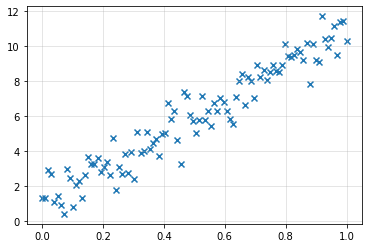

In [11]:
# RUN THIS TO GENERATE DATASET

# Generate plain linear dataset y = 10x + 1
torch.random.manual_seed(73)
x = torch.linspace(0, 1, 100)
y = 10 * x + 1 + torch.randn(100)

# check that - torch tensors are compatible with matplotlib as well
plt.scatter(x, y, marker='x')
plt.grid(alpha=0.4)
plt.show()


Predicted weight w = 9.705854415893555
Predicted bias b = 1.11815345287323


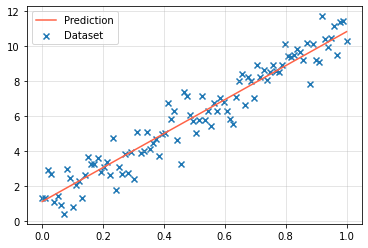

In [12]:
# Instantiate 1D linear model
f = LinearModel(size=1)

# Setup number of iterations and learning rate
n_iter = 300
learning_rate = 0.1


# Run optimization
iterator = tqdm.notebook.tqdm(range(n_iter), desc="Iterations")
for i in iterator:
    # Run forward prediction
    y_pred = f(x.unsqueeze(0))
    
    # Compute MSE loss
    loss = torch.mean((y - y_pred)**2)
    
    # Perform automatic gradient computation
    loss.backward()
    
    # Open wrapping block where we stop tracking computational graph
    with torch.no_grad():
        # Apply gradient descent step on w and b
        f.w -= learning_rate * f.w.grad
        f.b -= learning_rate * f.b.grad
        
        # Set gradients back to zero for next iteration
        f.w.grad.zero_()
        f.b.grad.zero_()
    
    # Log current loss value on progress bar
    iterator.set_postfix(mse_loss=loss.item())

    
# Display results
with torch.no_grad():
    print("Predicted weight w =", f.w.item())
    print("Predicted bias b =", f.b.item())
    plt.scatter(x.squeeze(), y, marker='x', label='Dataset')
    plt.plot(x.squeeze(), f(x.unsqueeze(0)), color='tomato', label='Prediction')
    plt.grid(alpha=0.4)
    plt.legend()
    pred_w, pred_b = f.w.item(), f.b.item()
    plt.show()

## Introducing PyTorch Optimizers

Remember when I told you there was more to Pytorch? In the previous example, applying gradient step to each individual parameter tensor was quite alright because there were only ... two. 

But what if we were trying to fit a resnet101 that has over 300 layers with 44 million parameters? We would really fancy some way to avoid explicitely writing gradient descent step of every individial parameter tensor.

That's why PyTorch proposes to take care of optimization for you with `torch.optim.Optimizer` instances. Let's see how this works for the same example again. You just need to provide the optimizer with the list of parameters it should be optimizing on – and its own hyperparameters such as learning rate – and then it takes care of executing the optimizing step for you.


Predicted weight w = 9.705921173095703
Predicted bias b = 1.118118166923523


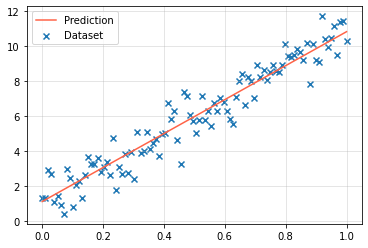

In [13]:
# Instantiate 1D linear model
f = LinearModel(size=1)

# Setup stochastic gradient descent optimizer on model parameters and number of iterations
n_iter = 300
optimizer = torch.optim.SGD(params=f.parameters(), lr=0.1)


# Run optimization
iterator = tqdm.notebook.tqdm(range(n_iter), desc="Iterations")
for i in iterator:
    # Run forward prediction
    y_pred = f(x.unsqueeze(0))
    
    # Compute MSE loss
    loss = torch.mean((y - y_pred)**2)
    
    # Perform automatic gradient computation
    loss.backward()
    
    # Take gradient step through backpropagation - no more manual updating of parameters
    optimizer.step()
    
    # Set gradient back to zeros for next iteration
    optimizer.zero_grad()
    
    # Log current loss value on progress bar
    iterator.set_postfix(mse_loss=loss.item())

    
# Display results
with torch.no_grad():
    print("Predicted weight w =", f.w.item())
    print("Predicted bias b =", f.b.item())
    plt.scatter(x.squeeze(), y, marker='x', label='Dataset')
    plt.plot(x.squeeze(), f.w * x.squeeze() + f.b, color='tomato', label='Prediction')
    plt.grid(alpha=0.4)
    plt.legend()
    pred_w, pred_b = f.w.item(), f.b.item()
    plt.show()

---
# $\textbf{5 - Hands on neural networks with}$ `torch.nn`

So far, there has been two occurences of the `torch.nn` module in this tutorial: `torch.nn.Module` and `torch.nn.Parameter`. But this module, meant for flexible design of parametric models (focus on neural networks though) has much more to offer.


Virtually every basic building block of neural networks is already available in there, from fully connected layers with `nn.Linear`, to batch normalization, activation functions, nD convolutions etc. But the module also offers preimplemented version of widely used loss functions. We showcase here a couple of these utilities but feel free to browse through the [docs](https://pytorch.org/docs/stable/nn.html).

- __Learnable modules__ : `nn.Linear`, `nn.Bilinear`, `nn.Conv1d`, `nn.Conv2d`, `nn.BatchNorm1d`, `nn.BatchNorm2d`

- __Non-learnable modules__: `nn.ReLU`, `nn.LeakyReLU`, `nn.Dropout1d`, `nn.Dropout2d`

- __Loss modules__: `nn.MSELoss`, `nn.L1Loss`, `nn.CrossEntropyLoss`, `nn.KLDivLoss`

And let's see with on an example how we can take advantage of all these building blocks to quickly prototype a fully modular toy neural network and train it

In [15]:
import torch.nn as nn

class ToyNeuralNetwork(nn.Module):
    """Model defining computation of simple parametric neural network
    
                +------+  +----+  +-------+  +------+
                |Linear+->+ReLU+->+Dropout+->+Linear|
                +------+  +----+  +-------+  +------+

    Args:
        input_size (int): dimension of input tensor
        hidden_size (int): dimension of hidden layer
        output_size (int): dimension of output tensor
        dropout_rate (int): rate of dropout applied to hidden layer
    """
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super().__init__()
        self.input_layer = nn.Linear(in_features=input_size, 
                                     out_features=hidden_size)
        self.output_layer = nn.Linear(in_features=hidden_size, 
                                      out_features=output_size)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
    
    def forward(self, x):
        """Defines operations of module computational graph
        
        Args:
            x (torch.Tensor): input variable tensor
        """
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

In [ ]:
# Instantiate 1D linear model
model = ToyNeuralNetwork(input_size=1, hidden_size=32, output_size=1, dropout_rate=0.4)
model.train()

# Setup MSE criterion
criterion = nn.MSELoss()

# Setup stochastic gradient descent optimizer on model parameters and number of iterations
n_iter = 1000
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


# Run optimization
iterator = tqdm.notebook.tqdm(range(n_iter), desc="Iterations")
for i in iterator:
    # Run forward prediction
    y_pred = model(x.unsqueeze(1))
    
    # Compute MSE loss
    loss = criterion(y, y_pred.squeeze())
    
    # Perform automatic gradient computation
    loss.backward()
    
    # Take gradient step through backpropagation
    optimizer.step()
    
    # Set gradient back to zeros for next iteration
    optimizer.zero_grad()
    
    # Log current loss value on progress bar
    iterator.set_postfix(mse_loss=loss.item())

    
# Display results
with torch.no_grad():
    plt.scatter(x.squeeze(), y, marker='x', label='Dataset')
    plt.plot(x.squeeze(), model(x.view(-1, 1)).squeeze(), color='tomato', label='Prediction')
    plt.grid(alpha=0.4)
    plt.legend()
    plt.show()

---